## P4DS: Assignment 3 (Autumn 2021)

# Data Analysis Project

#### Notebook template design: Brandon Bennett (School of Computing, University of Leeds).
Original: 2020.11.3<br>
Revised: 2021.03.02, 2021.11.10

# Mobile Phone's features Analysis and price-range classification

* Adnan Malik, mm21am@leeds.ac.uk
* Muhammad Syahrul, mm21ms@leeds.ac.uk

# Project Plan

## The Data (10 marks)

The data considered for "Mobile phone feature's analysis and price-range classification" is taken from www.kaggle.com:
https://www.kaggle.com/iabhishekofficial/mobile-price-classification

The data is divided into two .CSV files.
    
   1. mobile_train.csv
        * Size: ~62K
        * Rows: 2000
        * Columns: 21
   2. mobile_test.csv
        * Size: ~120K
        * Rows: 1000
        * Columns: 21

The data used to analyse inter-relationship between features and their relation to price_range is "mobile_train.csv". This data is later used for training a classification model (price_range as target variable). The data "mobile_test.csv" is used as a test-set to our classification model.

Each row in the data files contains information about a mobile phone, its features and price-range. The columns represent a list of different features that the mobile phone possesses or is expected to possess. 

The columns in "mobile_train.csv" are 
battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range.

And the columns in "mobile_test.csv" are 
id, battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi. 

It must be noted that the file "mobile_train.csv" does not have 'Id' column and the file "mobile_test.csv" does not have 'price_range' column. 

A description of all the columns are given below:
1. Id: Unique identifier for each column.
2. battery_power: It is the energy(mAh) that battery of the mobile phone can store.
3. blue: It indicates whether the phone has bluetooth or not.
4. clock_speed: Microprocessor's speed of the phone.
5. dual_sim: It indicates whether the phone has dual sim or not
6. fc: It is the Megapixels of the front camera of the phone.
7. four_g: It indicates whether the phone supports 4g or not.
8. int_memory: It is the internal memory of the phone in GBs (Gigabytes).
9. m_dep: Depth(cms) of mobile phone.
10. mobile_wt: weight(gms) of mobile phone.
11. n_cores: Number of cores in the processor.
12. pc: It is the Megapixels of the primary camera of the phone. 
13. px_height: Pixels resolution's height of the mobile phone.
14. px_width: Pixels resolution's weight of the mobile phone.
15. ram: Ram of the mobile phone in MBs (Megabytes) 
16. sc_h: Screen height(cms) of the mobile phone. 
17. sc_w: Screen width(cms) of the mobile phone.
18. talk_time: Time for which a battery lasts.
19. three_g: It indicates whether the phone supports 3g or not 
20. touch_screen: It indicates whether the phone is a touch-screen or not.
21. wifi: It indicates whether the phone has wifi built-in.
22. price_range: Indicates the price-range the phone falls in (1 - low price, 2 - medium price, 3 - high price, 4 - very high price).

The data is accurate when measured against our aim which is to analyse how different features  affect the price of a mobile phone and inter-relationship between the features.

_where it comes from, what data it contains, is it accurate. (Potentially you could create data from a simulation but you should still explain why and how you indend to generate this data.) 300-400_

## Project Aim and Objectives (5 marks)

The aim of the project is to understand the relationship between different Mobile phone features and also their relationship with the price-range of the mobile phone.

To use data cleaning, data visualisation python tools/libraries. To get an idea and find correlation between features, and also with price-range.

And by making use of statistical concepts such as ANOVA (using python statistical libraries) we intend to investigate and find answers for some general questions on relationship between most influencing features on price_range. An example of that will be to answer a question similar to: Does mobile battery power affect the Price? Or Does mobile size have any impact on Price?

By using the knowledge gained during these process, we then intend to develop a Machine-Learning Classification model which will help us in knowing the price-range (i,e it will help us know whether the mobile phone will have a "low" or "medium" or "high" or "very high" price) of a mobile phone when its features are listed as input to the model.

### Specific Objective(s)

* __Objective 1:__ To check relationship between different features in order to find the most influencing features to price-range. (Data Cleaning, Understanding & Visualisation)
* __Objective 2:__ To use statistical tools (ANOVA) to test our analysis and confirm our findings.
* __Objective 3:__ To find and develop the best (most-accurate) Machine Learning classification model to determine mobile phone's price-range.

## System Design (5 marks)

### Architecture

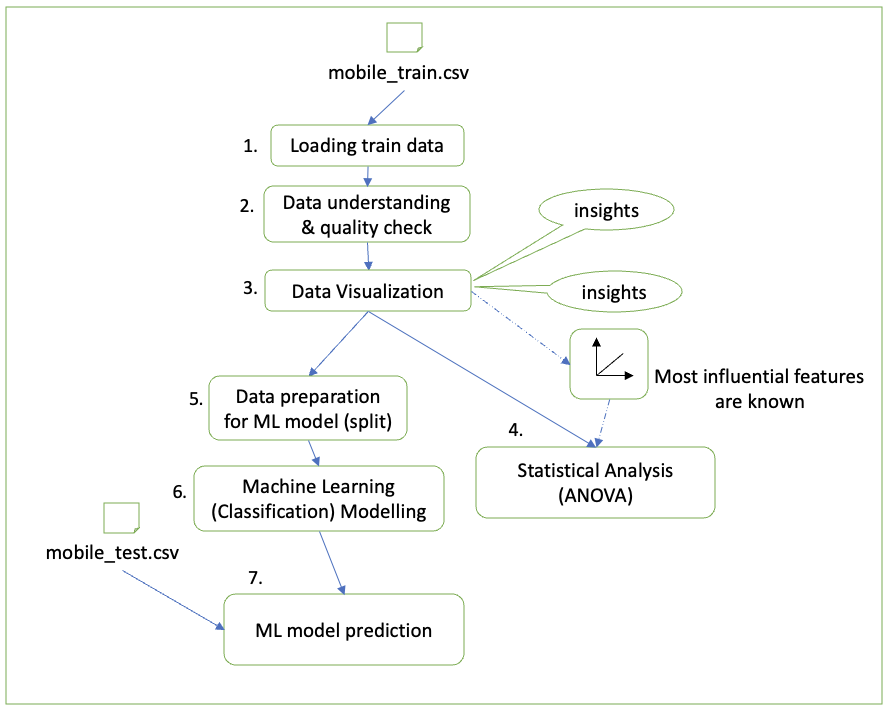

The architecture diagram can be understood in the following steps:
1. Loading train data - the data "mobile_train.csv" is loaded as a pandas Dataframe.
2. Data understanding & quality check - For understnding the data, Data summaries and information are listed and checked. A quality check for the data is done and checks are done for outliers, missing values, inconsistent values, special values and duplicate values etc. 
3. Data Visualisation - features in the data are visualised and relationship between features and target are realised. important insights from it are noted down and the most influential features to target variable (price-range) are noted..
4. Statistical Analysis (ANOVA) - The most influencial features are tested against the target variable and hypothesis testing are done to determine that the target variable are in reality effected by those features.
5. Data Preparation for ML model (split) - the data is checked for any descrepencies once again and is splitted further into training set and validation set.
6. Machine Learning (Classification) Modelling - A machine learning classification model is trained on the train set and validated on the validation set. Various different algorithms are compared in order to get the best model.
7. ML Model Prediction - The model is used to de prediction by loading and giving as input the "mobile_test.csv" data. The predicted values are looked to know the respective price_range for each record.
  
### Processing Modules and Algorithms

_Briefly list and describe the most significant computational components of your system and the algorithms you will use to implement them. 
This could include things like:_

* _cleaning the data by removing outliers_
* _combining different datasets_
* _converting samples to a special representaion (such as feature vectors)_
* _constructing a special data-structure (such as a decision tree)_
* _running some kind of analysis_

_Your list can be presented in similar form to the one just given, 
but should include a brief
but more specific description of the components and/or algorithms.
Probably three or four components is sufficient for most projects, but
you may want to have more._

# Program Code (15 marks)


_Importing necessary modules_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

_1. Loading "mobile_train.csv" and getting its shape, names of columns and displaying a few records._
---

In [2]:
df=pd.read_csv('mobile_train.csv')
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
display(df.head())

Shape: (2000, 21)
Columns: ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


_2. Data Understanding and Quality checks (Check for nulls, special values etc._
---

Checking columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Checking Nulls

In [4]:
print("Number of null values in the whole data-frame: ", df.isnull().sum().sum())

Number of null values in the whole data-frame:  0


Checking for Special Values

Filtering for first 4 columns (Non-Category, since categorical are checked for quality)

### --- ### --- ### --- ###
count    2000.000000
mean     2124.213000
std      1084.732044
min       256.000000
25%      1207.500000
50%      2146.500000
75%      3064.500000
max      3998.000000
Name: ram, dtype: float64
### --- ### --- ### --- ###
count    2000.000000
mean        4.309500
std         4.341444
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        19.000000
Name: fc, dtype: float64
### --- ### --- ### --- ###
count    2000.000000
mean        9.916500
std         6.064315
min         0.000000
25%         5.000000
50%        10.000000
75%        15.000000
max        20.000000
Name: pc, dtype: float64
### --- ### --- ### --- ###
count    2000.000000
mean     1238.518500
std       439.418206
min       501.000000
25%       851.750000
50%      1226.000000
75%      1615.250000
max      1998.000000
Name: battery_power, dtype: float64
### --- ### --- ### --- ###
count    2000.000000
mean       11.011000
std         5.463955
min         2

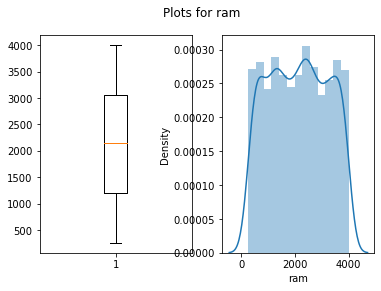

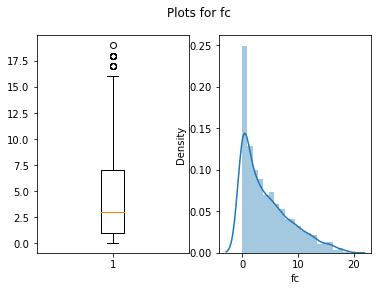

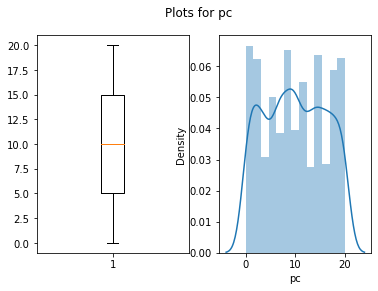

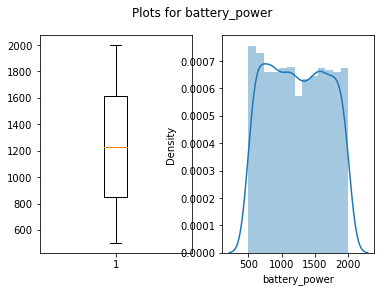

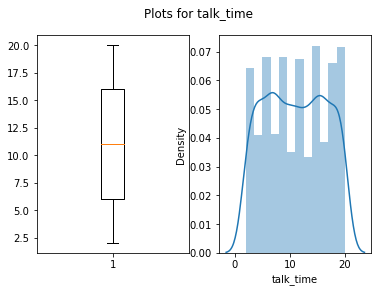

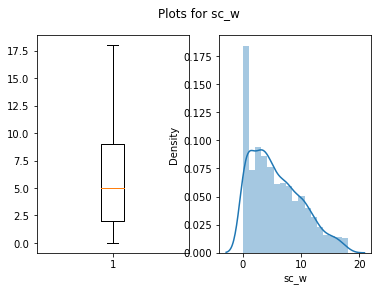

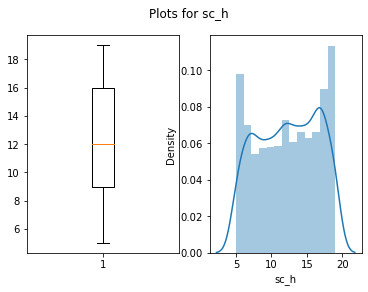

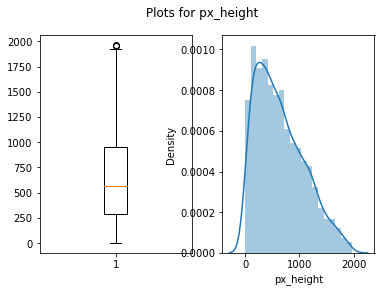

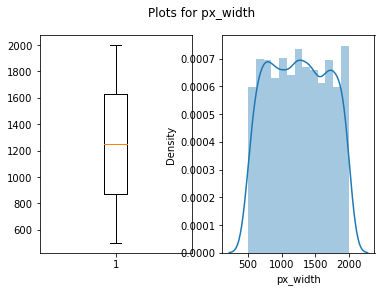

In [5]:
l=list(df.columns)
l=['ram','fc','pc','battery_power','talk_time','sc_w','sc_h','px_height','px_width']
def splplots(df,l):
    numofplots=len(l)
    for i in range(numofplots):
        print("### --- ### --- ### --- ###")
        print(df[l[i]].describe())
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.suptitle(f'Plots for {l[i]}')
        ax1.boxplot(df[l[i]])
        sns.distplot(df[l[i]],ax=ax2)
        plt.xlabel(l[i])
        
splplots(df,l)

On checking for special values and outliers the following issues in the data were observed so far:
1. px_height (pixel resolution height) = 0, which is not possible.
2. sc_w (screen width) = 0, which is not possible.
3. Potential outliers found for columns 'fc' and 'px_height', needs investigation.
4. skew in data for columns 'fc','px_height','sc_w'. potential outliers, needs investigation.
5. The column name "talk_time" is misleading. The data contained in it is actually "the time for which the battery lasts". So this requires a rename.

_Fixing the data-quality related issues below:_

Changing the name of the column "talk_time" to "battery_time"

In [6]:
df['battery_time']=df['talk_time']
df.drop('talk_time',inplace=True,axis=1)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,three_g,touch_screen,wifi,price_range,battery_time
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,0,0,1,1,19
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,1,1,0,2,7
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,1,1,0,2,9
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,1,0,0,2,11
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,1,1,0,1,15


Calculating % loss of records if we remove the unwanted records

Checking for columns "px_height" and "sc_w"

In [7]:
loss0=(df.shape[0]-df[df.px_height>=500].shape[0])
loss1=df.shape[0]-df[df.sc_w>=3].shape[0]
loss=loss0+loss1
print(f'data-loss (%) in case we remove records: {(loss/df.shape[0])*100} %')

data-loss (%) in case we remove records: 72.15 %


As the data loss is high Therefore, we will remove the column instead of records Dropping columns as they have many inconsistencies

In [8]:
df.drop(['px_height','sc_w'],inplace=True,axis=1)

This seems reasonable and there is no outlier as megapixels can go even beyond 19

0 as No front facing camera is present

_3. Data Visualisation_
---
_Visualising to find interesting information, Finding relations between features and between features and target_

Wifi and Bluetooth support

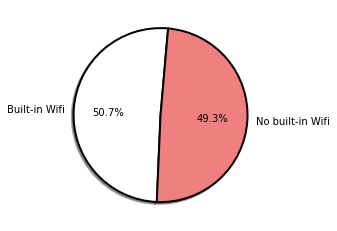

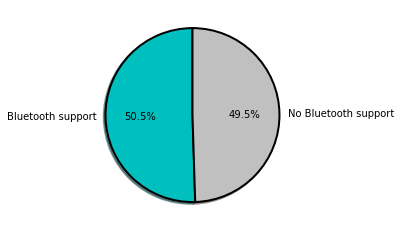

In [9]:
sns.reset_orig()
wp={'edgecolor':'black', 'linewidth':2}
plt.figure(0)
plt.pie(df.wifi.value_counts(),radius=1,startangle=85,wedgeprops=wp,shadow=True,colors=['w','lightcoral'],labels=['Built-in Wifi','No built-in Wifi'],autopct='%1.1f%%')
plt.figure(1)
plt.pie(df.blue.value_counts(),radius=1,startangle=90,wedgeprops=wp,shadow=True,colors=['c','silver'],labels=['Bluetooth support','No Bluetooth support'],autopct='%1.1f%%')
plt.show()

3g and 4g support

Number of cores in the mobile-phones

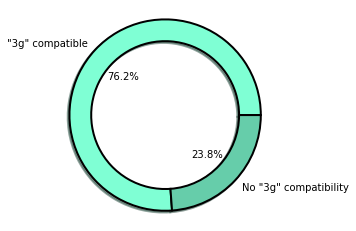

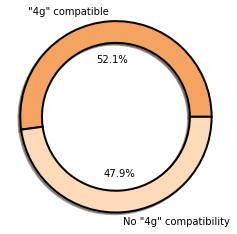

In [10]:
wp={'edgecolor':'black', 'linewidth':2,'width':.25}
plt.figure(0)
plt.pie(df.three_g.value_counts(),colors=['aquamarine','mediumaquamarine'],autopct='%1.1f%%',radius=1.1,labels=['"3g" compatible','No "3g" compatibility'],wedgeprops=wp,shadow=True)
plt.figure(1)
plt.pie(df.four_g.value_counts(),colors=['sandybrown','peachpuff'],autopct='%1.1f%%',radius=1.1,labels=['"4g" compatible','No "4g" compatibility'],wedgeprops=wp,shadow=True)
plt.show()

Inter-relationship between feature by using Correlation matrix

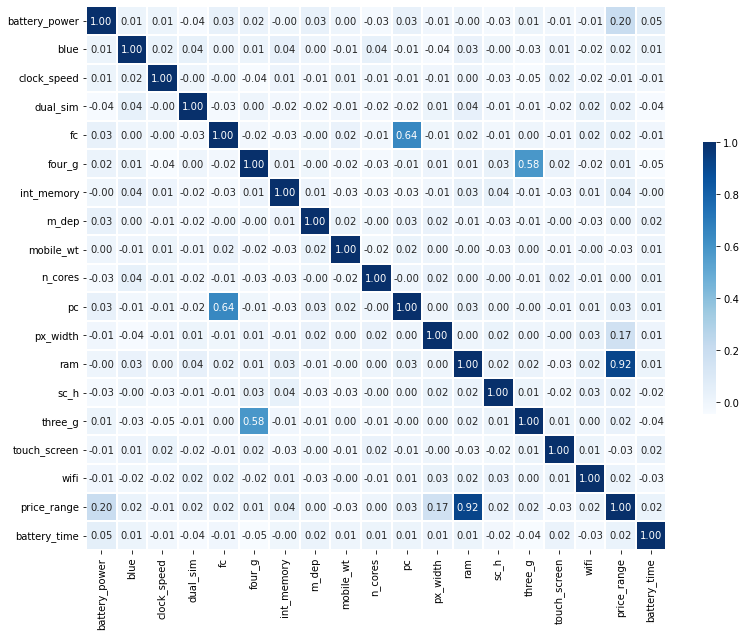

In [11]:
fig=sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Blues', linewidth=0.1,cbar_kws={"shrink": .5})
fig.figure.set_size_inches(13,10)

Points noted from Correlation Matrix:
- From the Correlation Matrix we can infer clearly that "Ram" affects the "Price Range" of a mobile phone.
- In comparison we see some effects of "Battery power" on "Price Range".

- Megapixels of "Primary camera" and "Front camera" seems related. This makes some intuitive sense as well.

- Some relation b/w "three_g" and "four_g" column's also present. Mostly because if a phone supports 4g it will mostly support 3g as well. Is it really so? We will answer this question below. 

However, it must be noted that the relation between "pc ~ fc", "sc_h ~ sc_w", "three_g ~ four_g", and "battery_power ~ price_range" are still not high enough.

So we move ahead, to check in detail for the most influential features (on price_range)

checking relation between 'fc' and 'pc'

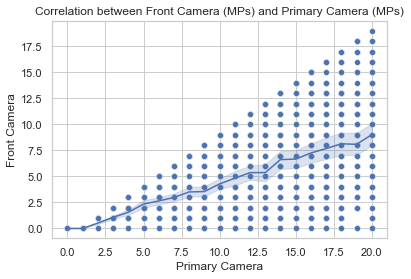

In [12]:
sns.set(style="whitegrid", color_codes=True)
fig=sns.scatterplot(df.pc,df.fc)
fig=sns.lineplot(df.pc,df.fc)
plt.title("Correlation between Front Camera (MPs) and Primary Camera (MPs)")
fig.set(xlabel="Primary Camera", ylabel="Front Camera")
plt.show()

Therefore we see a slightly linear relation between the two columns

Checking if battery power is related to Battery lasting time

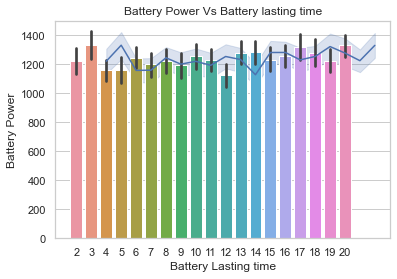

In [13]:
fig=sns.barplot(df.battery_time,df.battery_power)
fig=sns.lineplot(df.battery_time,df.battery_power)
fig.set(xlabel="Battery Lasting time",ylabel="Battery Power")
plt.title("Battery Power Vs Battery lasting time")
plt.show()

Effect of battery power on price range of the phone.

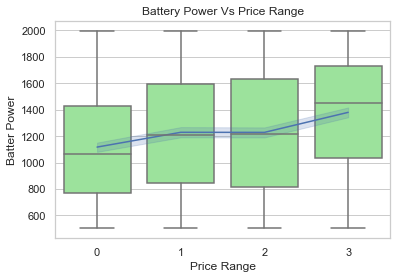

In [14]:
fig=sns.lineplot(df.price_range,df.battery_power)
fig=sns.boxplot(df.price_range,df.battery_power,color='lightgreen')
plt.title("Battery Power Vs Price Range")
fig.set(xlabel='Price Range',ylabel='Batter Power')
plt.show()

Effect of Ram on price range of the phone

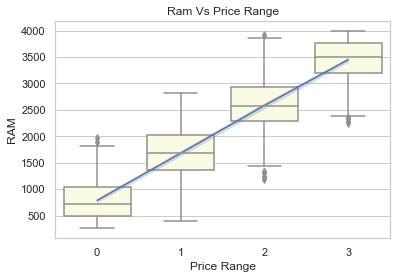

In [15]:
fig=sns.lineplot(df.price_range,df.ram)
fig=sns.boxplot(df.price_range,df.ram,color='lightyellow')
plt.title("Ram Vs Price Range")
fig.set(xlabel="Price Range", ylabel="RAM")
plt.show()

After Data-Visualisation and understanding different features, the following can be said about the features in our dataset:
1. The ratio of mobile phones with or without bluetooth are roughly similar.
2. The ratio of mobile phones with or without wifi are roughly similar.
3. Octa-core mobiles are the majority in the dataset while Hexa-cores seems to be the least.
4. Majority phones are 3g compatible. As for 4g, only 52% of total support 4g.
5. There seems to be a slightly linear relationship between front camera megapixels and primary camera megapixels.
6. battery seems to perform better (very slightly) for increasing battery powers. No strong correlation found.
7. Battery power and Ram seems to be those features who directly affect the price or price-range of the mobile phones.

_4. Statistical Analysis (ANOVA)_
---
Finding Answers to the following questions:
1. Does Mobile Battery-Power affect the Price?
2. Does Mobile Ram affect the Price?

In [16]:
import scipy.stats as stats
from scipy.stats import kstest
import statsmodels.api as sm
from bioinfokit.analys import stat
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

ANOVA FOR "BATTERY-POWER ~ PRICE-RANGE"

In [17]:
# Getting ANOVA summary
res = stat()
res.anova_stat(df=df, res_var='battery_power', anova_model='battery_power ~ C(price_range)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(price_range),3.0,1.750010e+07,5.833367e+06,31.598158,5.948688e-20
Residual,1996.0,3.684835e+08,1.846110e+05,NaN,NaN


In [18]:
# Post test
res = stat()
res.tukey_hsd(df=df, res_var='battery_power', xfac_var='price_range', anova_model='battery_power ~ C(price_range)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.548,-69.322652,70.418652,0.028519,0.900
1,1,3,151.116,81.245348,220.986652,7.864420,0.001
2,1,0,111.966,42.095348,181.836652,5.826965,0.001
3,2,3,151.664,81.793348,221.534652,7.892939,0.001
4,2,0,111.418,41.547348,181.288652,5.798446,0.001
5,3,0,263.082,193.211348,332.952652,13.691384,0.001


We assume normality for our feature and check it for normality

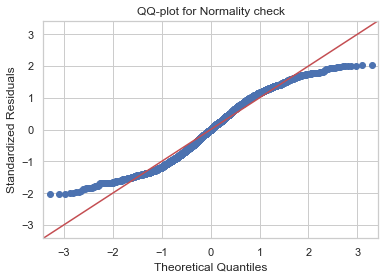

In [19]:
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.title('QQ-plot for Normality check')
plt.show()

ANOVA FOR "RAM ~ PRICE-RANGE"

In [20]:
# Getting ANOVA summary
res = stat()
res.anova_stat(df, res_var='ram', anova_model='ram ~ C(price_range)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(price_range),3.0,1.978211e+09,6.594035e+08,3520.110824,0.0
Residual,1996.0,3.739000e+08,1.873246e+05,NaN,NaN


In [21]:
res = stat()
res.tukey_hsd(df=df, res_var='ram', xfac_var='price_range', anova_model='ram ~ C(price_range)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,903.326,832.943694,973.708306,46.669382,0.001
1,1,3,1769.742,1699.359694,1840.124306,91.431848,0.001
2,1,0,894.176,823.793694,964.558306,46.196657,0.001
3,2,3,866.416,796.033694,936.798306,44.762466,0.001
4,2,0,1797.502,1727.119694,1867.884306,92.866039,0.001
5,3,0,2663.918,2593.535694,2734.300306,137.628505,0.001


We assume normality for our feature and check it for normality

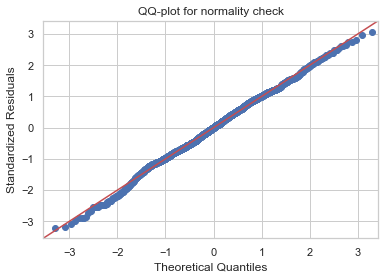

In [22]:
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.title("QQ-plot for normality check")
plt.show()


_5. Data Preparation (Split)_
---
We split our data into train and validation so as to make it fit for preparing a Machine Learning (Classification) Model

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop(['price_range'], axis=1)
y = df["price_range"]

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=21)

_6. Machine Learning (Classification) modelling_
---
Here we develop a ML Classification model, which will be used to classify the mobile phones into its respective price-range. 

We use different algorithms and compare their accuracy. In the end we go ahead with the model with the highest accuracy.

In [25]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

Comparing different Algorithms for best accuracy

In [26]:
algorithms = []
algorithms.append(('LR', LogisticRegression()))
algorithms.append(('LDA', LinearDiscriminantAnalysis()))
algorithms.append(('KNN', KNeighborsClassifier()))
algorithms.append(('CART', DecisionTreeClassifier()))
algorithms.append(('NB', GaussianNB()))
algorithms.append(('XGBoost', XGBClassifier()))
algorithms.append(('GBoost', GradientBoostingClassifier()))
algorithms.append(('SVM', SVC()))
algorithms.append(('RFC', RandomForestClassifier()))

results=[]
crossv_score={}
for i, al in algorithms:
    cv_results = cross_val_score(al, X_train, y_train, cv=5, scoring='accuracy')
    results.append(f"the average score of the model with the cross-validation: {i}, {cv_results.mean()}, {cv_results.std()}")    
    crossv_score[i]=cv_results.mean()

[01:02:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:02:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:02:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:02:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[Text(0.5, 0, 'Algorithms'), Text(0, 0.5, 'Cross-Validation score')]

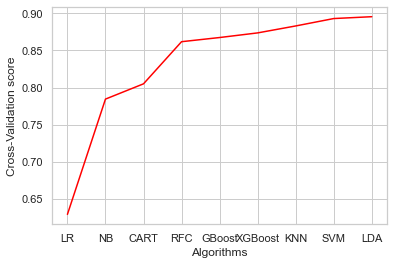

In [27]:
crossdf={}
crossdf['Alg']=[i for i in crossv_score.keys()]
crossdf['Score']=[i for i in crossv_score.values()]
crossdf=pd.DataFrame(crossdf).sort_values('Score')
# sns.barplot(crossdf.Alg,crossdf.Score,color='lightblue')

fig=sns.lineplot(crossdf.Alg,crossdf.Score,color='red')
fig.set(xlabel='Algorithms',ylabel='Cross-Validation score')

Testing Models

Model 1: XGBoost

In [28]:
model = XGBClassifier()
model.fit(X_train, y_train)

[01:02:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [29]:
#predict data train
y_training = model.predict(X_train)

#predict data validation
y_pred_validation = model.predict(X_validation)

In [30]:
def get_final_score(y_pred_validation, y_training):
    print(confusion_matrix(y_validation, y_pred_validation))
    print(classification_report(y_validation, y_pred_validation))

    accuracy = accuracy_score(y_train, y_training)
    print("Accuracy model test: %.2f%%" % (accuracy * 100.0))

    accuracy = accuracy_score(y_validation, y_pred_validation)
    print("Accuracy model validation: %.2f%%" % (accuracy * 100.0))
    return accuracy
accxgb=get_final_score(y_pred_validation, y_training)

[[103  17   0   0]
 [  9  77   9   0]
 [  0   6  77   7]
 [  0   0   6  89]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       120
           1       0.77      0.81      0.79        95
           2       0.84      0.86      0.85        90
           3       0.93      0.94      0.93        95

    accuracy                           0.86       400
   macro avg       0.86      0.87      0.86       400
weighted avg       0.87      0.86      0.87       400

Accuracy model test: 100.00%
Accuracy model validation: 86.50%


Testing Models

Model 2: KNN

In [31]:
model2 = KNeighborsClassifier()
model2.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
#predict data train for model 2
y_training2 = model2.predict(X_train)

#predict data validation for model 2
y_pred_validation2 = model2.predict(X_validation)

In [33]:
accknn=get_final_score(y_pred_validation2, y_training2)

[[105  15   0   0]
 [  6  82   7   0]
 [  0   6  78   6]
 [  0   0   8  87]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       120
           1       0.80      0.86      0.83        95
           2       0.84      0.87      0.85        90
           3       0.94      0.92      0.93        95

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400

Accuracy model test: 91.88%
Accuracy model validation: 88.00%


Testing Models

Model 3: LDA

In [34]:
model3 = LinearDiscriminantAnalysis()
model3.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [35]:
#predict data train for model 3
y_training3 = model3.predict(X_train)

#predict data validation for model 3
y_pred_validation3 = model3.predict(X_validation)

In [36]:
acclda=get_final_score(y_pred_validation3, y_training3)

[[110  10   0   0]
 [  2  86   7   0]
 [  0   6  81   3]
 [  0   0   9  86]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       120
           1       0.84      0.91      0.87        95
           2       0.84      0.90      0.87        90
           3       0.97      0.91      0.93        95

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400

Accuracy model test: 90.31%
Accuracy model validation: 90.75%


[Text(0.5, 0, 'Accuracy (%)'), Text(0, 0.5, 'Model')]

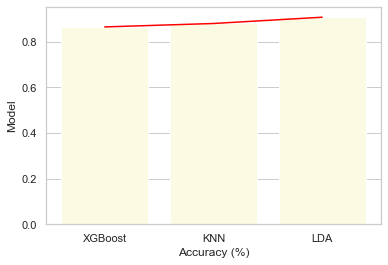

In [37]:
fig=sns.barplot(['XGBoost','KNN','LDA'],[accxgb,accknn,acclda],color='lightyellow')
fig=sns.lineplot(['XGBoost','KNN','LDA'],[accxgb,accknn,acclda],color='red')
fig.set(xlabel="Accuracy (%)", ylabel="Model")

We conclude that LDA will be the best algorithm for our modelling
as XGBoost seems to overfit the data and KNN accuracy seems to reduce on validation.

_7. Machine Learning Model prediction (Classification)_
---
We use the test data "mobile_test.csv" as an input to our model and classify the mobile phones into their respective price-range.

In [38]:
df_test=pd.read_csv("mobile_test.csv")
print(df_test.columns)
df_test.head()

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [39]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

Cleaning the test data before prediction

In [40]:
# Renaming column "talk_time" by creating a new column "battery_time".
df_test['battery_time']=df_test['talk_time']
# 'talk_time','id','px_height' and 'sc_w' columns are unwanted, removing them and naming our test set as "X_test"
X_test=df_test.drop(["id","px_height","sc_w","talk_time"],axis=1)

In [41]:
# Predicting the class of test-data records of mobile phones
# We use KNN (model2)
y_pred2 = model2.predict(X_test)

In [42]:
y_pred2

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 1, 2, 1, 3, 2, 1, 3,
       2, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 2, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 2, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 0, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 2, 1, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 3, 2, 1, 2, 2,
       3, 3, 1, 2, 3, 2, 3, 2, 2, 1, 1, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 2, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 2, 0, 2, 3, 1,

Our classification was success!!

###  _More code cells_
_You can add as many code cells as you require, but it is
recommended that you break code into relatively small chunks and
do not exceed the maximum number of lines stated above._

# Project Outcome (10 + 10 marks)

Please Note: All the plots attached below are plotted above originally.

## Overview of Results
The aim of the project was to understand how features in a mobile phone affects its price. And then to point out the most influential features to price. We were successful in finding the following:
1. We tried to understand our data and know that to what extent a mobile phone feature affects it price by visualisation.
2. We found 'Ram' and 'Battery Power' to be the most influential features to mobile's price-range.
3. We developed a Machine Learning (Classification) model which can be used to classify mobile phone into its respective price-range based on the features it possess.

## Objective 1

### To check relationship between different features in order to find the most influencing features to price-range. (Data Cleaning, Understanding & Visualisation)

After cleaning our data and understanding different columns and rows. We found that many features have effects on others and many dont. there were features which did not have effect on any column and so they were removed.

We found that there's a linear relationship between Front-Camera (MPs) and the Primary-Camera (MPs). As can be seen below in _figure 1_.

We also found that the higher the battery_power is the longer a mobile's battery is expected to last. However, this may require further investigation but from the plot in _figure 2_, we can deduce what followed.

Then we found the two of the most influential features which affects the price-range of a mobile phone than any other feature. See _figure 3_, for Ram which if it is more then the price-range of the phone will be higher. the second one is Battery_Power, which however is nearly same for mobile phones in price-range 1(medium) and 2(high) but still has significant influence on the price, See _figure 4_.

So we conclude that our objective of finding influencing features is fulfilled.

### Visualisations

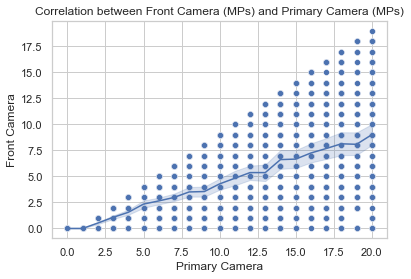
_figure 1._ The Scatterplot-Linepot a relationship between Megapixels of Front-Camera and Primary-Camera of a mobile phone


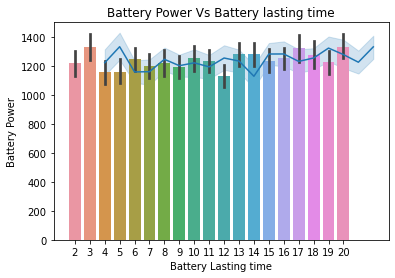
_figure 2._ The Bar-chart shows how battery-power can affect battery's lasting time.

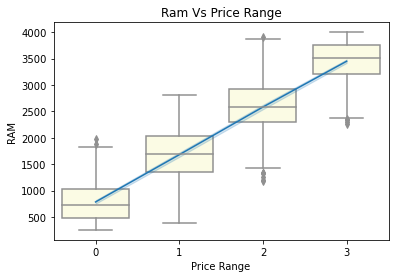
_figure 3._ The Box-Line plot show the linear-relationship between Ram and Price-Range

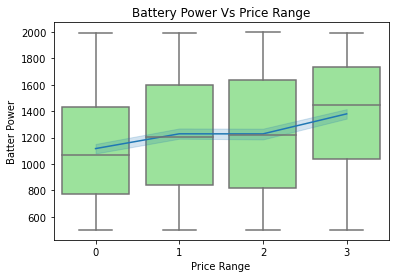
_figure 4._ The Box-Line plot illustrates how battery-power influences price-range.

## Objective 2
### To use statistical tools (ANOVA) to test our analysis and confirm our findings.
In order to investigate whether "Ram" and "battery" are responsible for a change in "Price-Range" of the mobile phones, we perform Analysis of variance (ANOVA) for our sample.

First, We performed Anova with a hypothesis that "Ram" doesnt affect "Price-Range". And on performing the test we were able to successfully reject this hypothesis therefore confirming that Ram does affect the Price-Range. Effect of Ram on each Price-Range was different and price-range increases with increase in Ram. The residuals were plotted and checked for Normality and were found Normally distributed using QQ-Plot, See _Figure 1_.

Similar test was performed for "Battery-Power" and it was assumed at first that it does'nt affect "Price-Range" but this assumption/hypothesis was rejected. Effect of Battery-Power was found same for Price-Range 1(medium) and 2(high), However it does effect price range between 0(low) to 1(medium) and then from 2(high) to 3(very high). Therefore, Battery power was found responsible for affecting "Price-Range" of Moblile phones. Residuals were plotted and checked for normality using QQ-Plot, See _Figure 2_.

### Visualisation
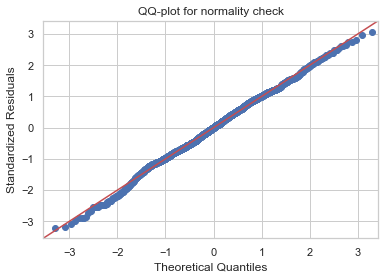
_Figure 1._ QQ-Plot for normality check for "Ram", the more the points align with the straight line the more stronger proof we have for normality.

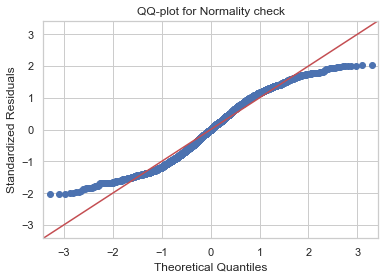
_Figure 2._ QQ-Plot for normality check for "Battery Power", the more the points align with the straight line the more stronger proof we have for normality.

## Objective 3
### To find and develop the best (most-accurate) Machine Learning classification model to determine mobile phone's price-range.

After doing the necessary tests on the most-influential features (Ram & Battery-Power), We wanted to train a model which will take as input different features of a mobile-phone and predict its price-range. 
For this purpose we started by splitting our data into a training set and a validation set. We used the training set for the purpose of modelling and the validation set to check how good it performs. The training set data is fed into algorithms to get a cross-validation score, this will help us decide which algorithm we should proceed with.
So for this we consider different types of Machine learning algorithms to use them and then select the best performing algorithms among them. The algorithms taken were:
1. Logistic Regression
2. Linear Discriminant Analysis
3. K-Nearest Neighbors
4. Decision-Tree 
5. GaussianNB
6. XGBoost
7. GBoost
8. Support Vector Machines
9. Random Forest
The data was fed to these algorithms to get a cross-validation score, see _Figure 1_. As is clear the best performing algorithm is LDA.

So we decide the good performing 3 models to go ahead with and check their accuracy by using the validation dataset. the 3 models we proceeded with was:
1. XGBoost 
2. KNN (K-Nearest Neighbors)
3. LDA (Linear Discriminant Analysis)

So three different models were fitted on the data and were checked against the cross-validation set to get the accuracy of the model, It was found that the best model formed was that of LDA Classifier. See _Figure 2_.

Therefore we finalised our model and proceeded with Prediction stage,
In prediction stage we took a test data "mobile_test.csv" and predicted price-range for different phones. Our classification was a success and prediction was carried out as expected.

### Visualisation
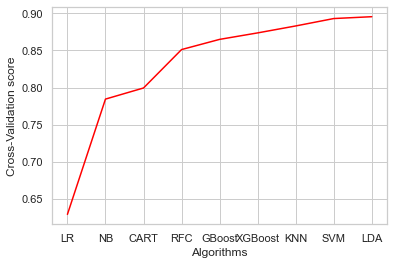
_Figure 1._ A line-plot showing a comparison of Cross-validation score between different modelling algorithms.

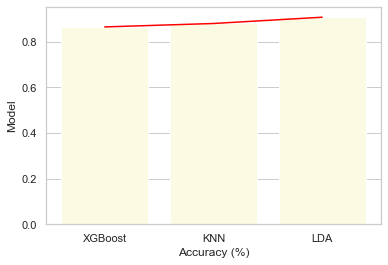
_Figure 2._ A bar-chart comparing the "Accuracy" of three models which were fitted to the data (LDA, XGBoost, KNN).

# Conclusion (5 marks)
### Achievements
As we had expected, We found that the price-range of a mobile phone was highly affected by two of the features in particular. They are Ram and Battery power. It could be concluded that The higher the ram the more will the price of the mobile. For battery power it was found that as the battery power is increased it increases the price of the mobile phone from low priced to medium priced and from high priced to very-high priced mobile phones significantly but not so much between medium and high priced mobile phones.
Also, the Model prepared for classification seems to work as expected.

### Limitations

The limitation of our analysis was a lack of data, so we cannot make purely certain statements about our analysis. Another issue was the present of many redundant columns in data which required removing and lead to some more data-loss. However the analysis could still points towards a way where investigation can be done.

### Future Work

In future we would like to get a larger data-set and try our analysis on it to see how other features can affect the price of the mobile phones. And to train a much stronger model. We wish to enquire more about how pixels affect price_range of mobile phones in the future.